#### Importing the libraries ####

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_chunk = pd.read_csv('faers_finaldata.csv',chunksize=1000000)

In [3]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    # perform data filtering 
    chunk_filter = chunk
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk_filter)
    
# concat the list into dataframe 
df_concat = pd.concat(chunk_list)

D:\softwares\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13,15,16,17,20,33,35,36,37,38,42,43,44,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\softwares\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15,16,17,20,32,33,36,37,38,42,43,44,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\softwares\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10,16,20,33,35,36,37,38,42,43,44,47,48,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\softwares\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10,13,16,20,33,35,36,37,38,42,43,44,47) have mixed types. Specify dtype option 

In [4]:
df_faers = df_concat

In [5]:
df_concat.dur.unique()

array(['void'], dtype=object)

In [6]:
df_faers.shape

(5000000, 58)

In [7]:
df_faers = df_faers[0:2000000]

In [8]:
df_faers.shape

(2000000, 58)

In [9]:
df_faers.wt_cod.unique()

array(['KG', nan], dtype=object)

In [10]:
# import missingno
# missingno.matrix(df_faers[0:100000],figsize=(12,8))

In [11]:
df_faers.isnull().sum()

primaryid                 0
caseid_x_x                0
caseversion               0
i_f_code                  0
event_dt                852
mfr_dt                    0
init_fda_dt               0
fda_dt                    0
rept_cod                  0
auth_num            2000000
mfr_num                   0
mfr_sndr                  0
lit_ref             1981856
age                  448069
age_cod              448069
age_grp             1996388
sex                  440161
e_sub                     0
wt                   743014
wt_cod               743014
rept_dt                   0
to_mfr              2000000
occp_cod                  0
reporter_country          0
occr_country              0
caseid_y_x                0
drug_seq                  0
role_cod                  0
drugname                  0
prod_ai               28234
val_vbm                   0
route                155981
dose_vbm            1203693
cum_dose_chr        1894735
cum_dose_unit       1894735
dechal              

In [12]:
df_faers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 58 columns):
primaryid           int64
caseid_x_x          int64
caseversion         int64
i_f_code            object
event_dt            float64
mfr_dt              float64
init_fda_dt         int64
fda_dt              int64
rept_cod            object
auth_num            object
mfr_num             object
mfr_sndr            object
lit_ref             object
age                 float64
age_cod             object
age_grp             object
sex                 object
e_sub               object
wt                  float64
wt_cod              object
rept_dt             float64
to_mfr              float64
occp_cod            object
reporter_country    object
occr_country        object
caseid_y_x          int64
drug_seq            int64
role_cod            object
drugname            object
prod_ai             object
val_vbm             int64
route               object
dose_vbm            objec

#### Imputing the missing values ###

In [13]:
num = df_faers.select_dtypes(exclude=object)

In [14]:
num.columns, num.shape

(Index(['primaryid', 'caseid_x_x', 'caseversion', 'event_dt', 'mfr_dt',
        'init_fda_dt', 'fda_dt', 'age', 'wt', 'rept_dt', 'to_mfr', 'caseid_y_x',
        'drug_seq', 'val_vbm', 'cum_dose_chr', 'exp_dt', 'nda_num', 'dose_amt',
        'caseid_x_y', 'dsg_drug_seq', 'caseid_x', 'caseid_y'],
       dtype='object'), (2000000, 22))

In [15]:
num_cols = ['primaryid', 'caseid_x_x', 'caseversion', 'event_dt', 'mfr_dt',
        'init_fda_dt', 'fda_dt', 'age', 'wt', 'rept_dt', 'caseid_y_x',
        'drug_seq', 'val_vbm', 'cum_dose_chr', 'nda_num', 'dose_amt',
        'caseid_x_y', 'dsg_drug_seq', 'caseid_x', 'caseid_y']

In [16]:
df_faers[num_cols] = df_faers[num_cols].fillna(df_faers[num_cols].mean())

D:\softwares\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [17]:
#df_faers[num_cols].isna().sum()
df_faers[num_cols] = df_faers[num_cols].replace('na',np.nan,regex=True)

In [18]:
df_faers[num_cols].isna().sum()

primaryid       0
caseid_x_x      0
caseversion     0
event_dt        0
mfr_dt          0
init_fda_dt     0
fda_dt          0
age             0
wt              0
rept_dt         0
caseid_y_x      0
drug_seq        0
val_vbm         0
cum_dose_chr    0
nda_num         0
dose_amt        0
caseid_x_y      0
dsg_drug_seq    0
caseid_x        0
caseid_y        0
dtype: int64

In [19]:
objs = df_faers.select_dtypes(include=object)

In [20]:
objs.columns

Index(['i_f_code', 'rept_cod', 'auth_num', 'mfr_num', 'mfr_sndr', 'lit_ref',
       'age_cod', 'age_grp', 'sex', 'e_sub', 'wt_cod', 'occp_cod',
       'reporter_country', 'occr_country', 'role_cod', 'drugname', 'prod_ai',
       'route', 'dose_vbm', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num',
       'dose_unit', 'dose_form', 'dose_freq', 'start_dt', 'end_dt', 'dur',
       'dur_cod', 'caseid_y_y', 'indi_drug_seq', 'indi_pt', 'outc_cod', 'pt',
       'drug_rec_act'],
      dtype='object')

In [21]:
obj_columns = ['i_f_code', 'rept_cod','mfr_num', 'mfr_sndr', 'lit_ref',
       'age_cod', 'age_grp', 'sex', 'e_sub','occp_cod',
       'reporter_country', 'occr_country', 'role_cod', 'drugname', 'prod_ai',
       'route', 'dose_vbm', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num',
       'dose_unit', 'dose_form', 'dose_freq', 'start_dt', 'end_dt', 'dur',
       'dur_cod', 'caseid_y_y', 'indi_drug_seq', 'indi_pt', 'outc_cod', 'pt',
       'drug_rec_act']

In [22]:
df_faers[obj_columns].isnull().sum()

i_f_code                  0
rept_cod                  0
mfr_num                   0
mfr_sndr                  0
lit_ref             1981856
age_cod              448069
age_grp             1996388
sex                  440161
e_sub                     0
occp_cod                  0
reporter_country          0
occr_country              0
role_cod                  0
drugname                  0
prod_ai               28234
route                155981
dose_vbm            1203693
cum_dose_unit       1894735
dechal               312039
rechal              1302016
lot_num             1222299
dose_unit           1035417
dose_form            979749
dose_freq           1295053
start_dt                  0
end_dt                    0
dur                       0
dur_cod                   0
caseid_y_y                0
indi_drug_seq             0
indi_pt                   0
outc_cod                  0
pt                        0
drug_rec_act              0
dtype: int64

In [23]:
df_faers[obj_columns] = df_faers[obj_columns].fillna(df_faers[obj_columns].mode().iloc[0])

In [24]:
df_faers[obj_columns].shape

(2000000, 34)

In [25]:
df_faers.shape

(2000000, 58)

In [26]:
df_faers.isnull().sum()

primaryid                 0
caseid_x_x                0
caseversion               0
i_f_code                  0
event_dt                  0
mfr_dt                    0
init_fda_dt               0
fda_dt                    0
rept_cod                  0
auth_num            2000000
mfr_num                   0
mfr_sndr                  0
lit_ref                   0
age                       0
age_cod                   0
age_grp                   0
sex                       0
e_sub                     0
wt                        0
wt_cod               743014
rept_dt                   0
to_mfr              2000000
occp_cod                  0
reporter_country          0
occr_country              0
caseid_y_x                0
drug_seq                  0
role_cod                  0
drugname                  0
prod_ai                   0
val_vbm                   0
route                     0
dose_vbm                  0
cum_dose_chr              0
cum_dose_unit             0
dechal              

In [27]:
df_faers = df_faers.drop(['exp_dt','to_mfr','auth_num'],axis=1)

In [28]:
df_faers.shape

(2000000, 55)

In [29]:
cont_var = ['primaryid', 'caseid_x_x', 'caseversion', 'event_dt', 'mfr_dt',
        'init_fda_dt', 'fda_dt', 'age', 'wt', 'rept_dt', 'caseid_y_x',
        'drug_seq', 'val_vbm', 'cum_dose_chr', 'nda_num', 'dose_amt',
        'caseid_x_y', 'dsg_drug_seq', 'caseid_x', 'caseid_y']

In [30]:
df_faers[cont_var].boxplot(return_type='axes',figsize=(24,8))

In [31]:
q75, q25 = np.percentile(df_faers.loc[:,'wt'],[75,25])

In [32]:
q75

126.0

In [33]:
q25

105.63726964340889

In [34]:
iqr = q75-q25

In [35]:
iqr

20.362730356591115

In [36]:
min = q25 - (iqr*1.5)

In [37]:
min

75.09317410852222

In [38]:
max = q75 + (iqr*1.5)

In [39]:
max

156.54409553488668

In [40]:
#df_faers[(df_faers['wt']) > 75 & (df_faers['wt'] < 156)].sum()

In [41]:
df_faers.outc_cod.value_counts()

HO    937352
OT    935683
LT    111435
DE      9562
DS      5968
Name: outc_cod, dtype: int64

In [42]:
df_faers.shape

(2000000, 55)

In [43]:
df_faers[num_cols].columns

Index(['primaryid', 'caseid_x_x', 'caseversion', 'event_dt', 'mfr_dt',
       'init_fda_dt', 'fda_dt', 'age', 'wt', 'rept_dt', 'caseid_y_x',
       'drug_seq', 'val_vbm', 'cum_dose_chr', 'nda_num', 'dose_amt',
       'caseid_x_y', 'dsg_drug_seq', 'caseid_x', 'caseid_y'],
      dtype='object')

In [44]:
df_faers['label'] = df_faers['outc_cod']

In [45]:
df_faers = df_faers.drop(['outc_cod'],axis=1)

In [46]:
df_faers

,primaryid,caseid_x_x,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,mfr_num,...,dur,dur_cod,caseid_y_y,indi_drug_seq,indi_pt,caseid_x,caseid_y,pt,drug_rec_act,label
0,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Abdominal adhesions,void,HO
1,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Anaemia,void,HO
2,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Arrhythmia,void,HO
3,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Arthralgia,void,HO
4,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Atrial fibrillation,void,HO
5,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Back pain,void,HO
6,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Blood pressure decreased,void,HO
7,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Blood pressure increased,void,HO
8,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Blood pressure systolic increased,void,HO
9,1000808590,10008085,90,F,20131213.0,20190129.0,20140313,20190212,EXP,PHHY2013CA071340,...,void,void,10008085.0,1.0,Neuroendocrine tumour,10008085.0,10008085,Body temperature decreased,void,HO


In [47]:
df_faers.wt.unique()

array([ 50.34      , 105.63726964,  80.        ,  80.7       ,
        64.3       ,  60.        ,  82.1       ,  58.97      ,
        65.76      , 126.        ,  44.        ,  77.        ])

In [48]:
obj_columns = ['i_f_code', 'rept_cod','mfr_num', 'mfr_sndr', 'lit_ref',
       'age_cod', 'age_grp', 'sex', 'e_sub', 'wt_cod', 'occp_cod',
       'reporter_country', 'occr_country', 'role_cod', 'drugname', 'prod_ai',
       'route', 'dose_vbm', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num',
       'dose_unit', 'dose_form', 'dose_freq', 'start_dt', 'end_dt', 'dur',
       'dur_cod', 'caseid_y_y', 'indi_drug_seq', 'indi_pt', 'label', 'pt',
       'drug_rec_act']

In [49]:
df_faers.age_grp.unique()

array(['A'], dtype=object)

In [50]:
df_faers.label.value_counts()

HO    937352
OT    935683
LT    111435
DE      9562
DS      5968
Name: label, dtype: int64

In [51]:
df_faers['label'] = df_faers['label'].replace({'HO':0,'OT':1,'LT':2,'DE':3,'DS':4})

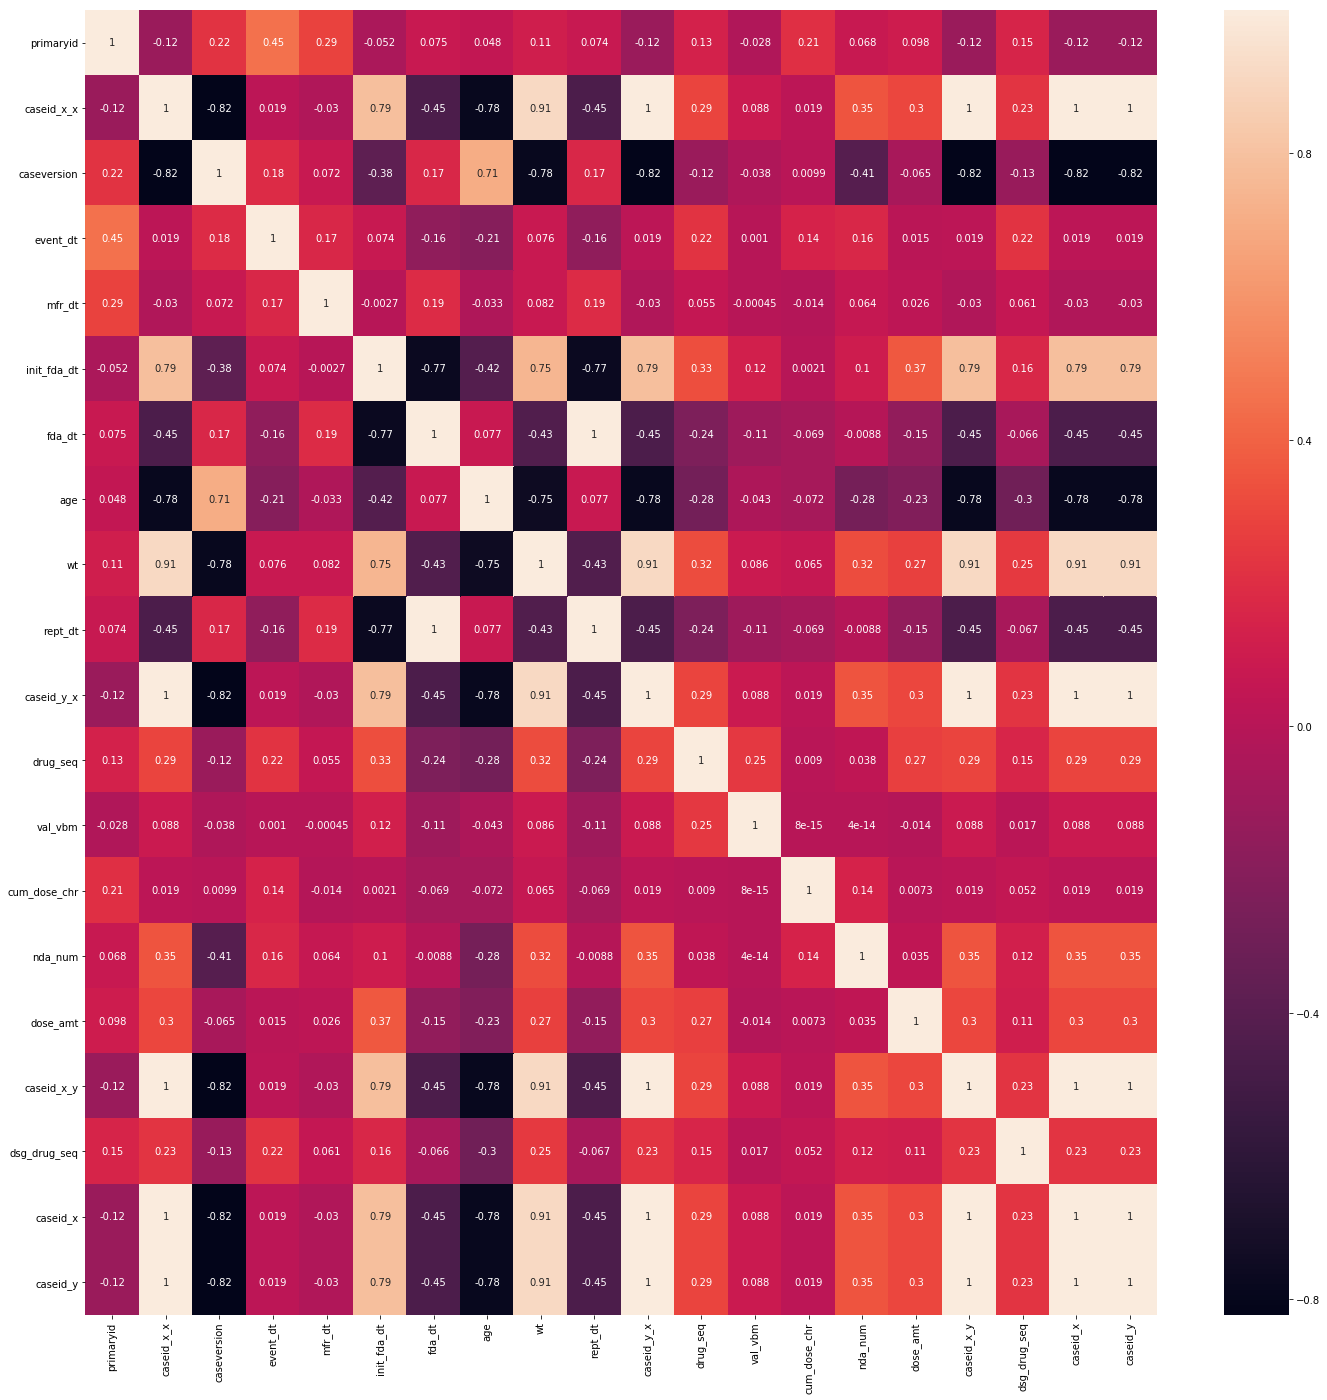

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24,24)) 
mask = np.zeros_like(df_faers[num_cols].corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_faers[num_cols].corr(), ax= ax, annot= True)

In [53]:
df_faers.caseid_x.unique()

array([10008085., 10010748., 10017132., 10017231., 10018981., 10021472.,
       10022215., 10029285., 10032297., 10036283., 10037385., 10039377.,
       10042375., 10044263., 10044769., 10045305., 10045651., 10045880.,
       10046839., 10048308., 10053685., 10055285., 10056184., 10058438.,
       10060466., 10063982., 10064018.])

In [54]:
df_faers.caseid_x_y.unique()

array([10008085., 10010748., 10017132., 10017231., 10018981., 10021472.,
       10022215., 10029285., 10032297., 10036283., 10037385., 10039377.,
       10042375., 10044263., 10044769., 10045305., 10045651., 10045880.,
       10046839., 10048308., 10053685., 10055285., 10056184., 10058438.,
       10060466., 10063982., 10064018.])

In [55]:
df_faers.caseid_x_x.unique()

array([10008085, 10010748, 10017132, 10017231, 10018981, 10021472,
       10022215, 10029285, 10032297, 10036283, 10037385, 10039377,
       10042375, 10044263, 10044769, 10045305, 10045651, 10045880,
       10046839, 10048308, 10053685, 10055285, 10056184, 10058438,
       10060466, 10063982, 10064018], dtype=int64)

In [56]:
df_faers.caseid_y.unique()

array([10008085, 10010748, 10017132, 10017231, 10018981, 10021472,
       10022215, 10029285, 10032297, 10036283, 10037385, 10039377,
       10042375, 10044263, 10044769, 10045305, 10045651, 10045880,
       10046839, 10048308, 10053685, 10055285, 10056184, 10058438,
       10060466, 10063982, 10064018], dtype=int64)

In [57]:
#df_faers = df_faers.drop(['caseid_x_x','caseid_y_y','caseidy'],axis=1)

In [58]:
df_faers = df_faers.drop(['caseid_y','init_fda_dt'],axis=1)

In [59]:
df_faers.shape

(2000000, 53)

In [60]:
num_cols = ['primaryid', 'caseversion', 'event_dt', 'mfr_dt',
        'fda_dt', 'age', 'wt', 'rept_dt',
        'drug_seq', 'val_vbm', 'cum_dose_chr', 'nda_num', 'dose_amt',
        'dsg_drug_seq', 'caseid_x']

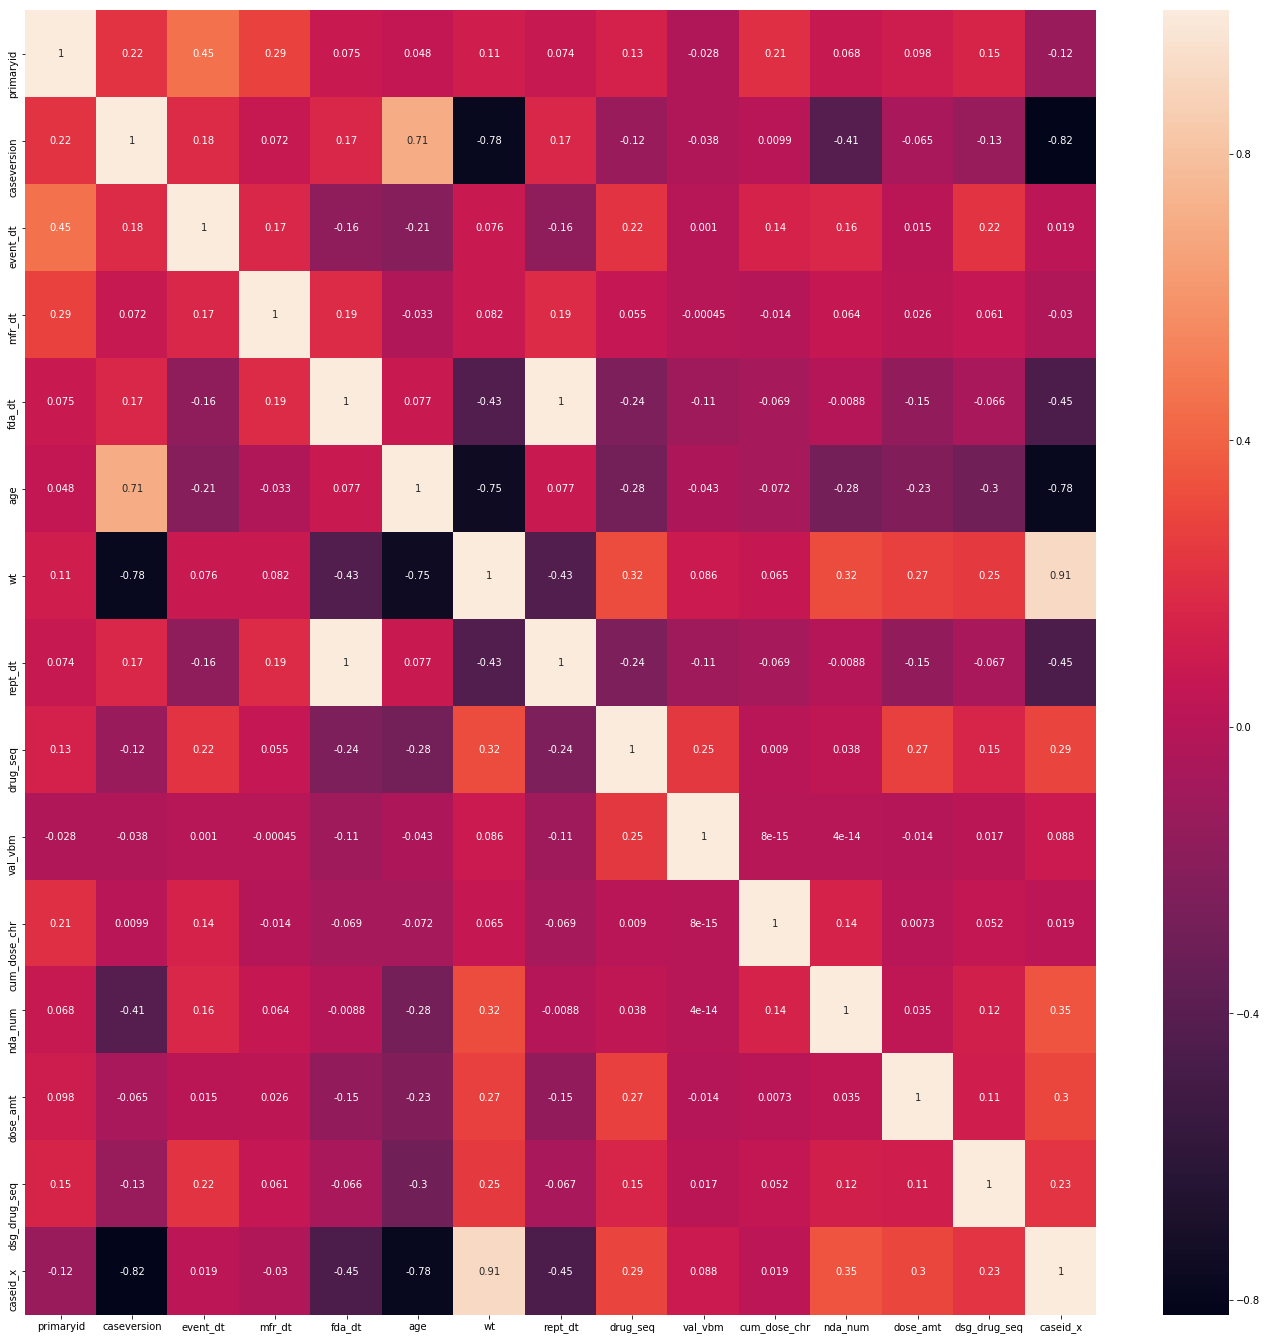

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24,24)) 
mask = np.zeros_like(df_faers[num_cols].corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_faers[num_cols].corr(), ax= ax, annot= True)

In [62]:
#df_faers = df_faers.drop(['init_fda_dt'],axis=1)

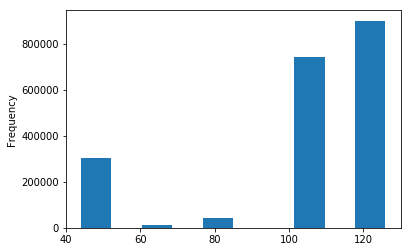

In [63]:
df_faers.wt.plot(kind='hist')

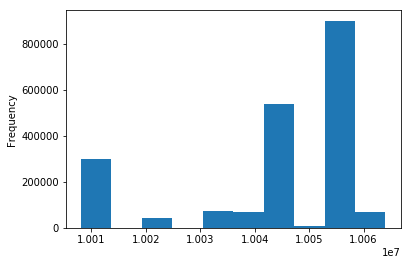

In [64]:
df_faers.caseid_x.plot(kind='hist')

In [65]:
df_faers = df_faers.drop(['caseid_x'],axis=1)

In [66]:
num_cols = ['primaryid', 'caseversion', 'event_dt', 'mfr_dt',
        'fda_dt', 'age', 'wt', 'rept_dt',
        'drug_seq', 'val_vbm', 'cum_dose_chr', 'nda_num', 'dose_amt',
        'dsg_drug_seq']

In [67]:
df_faers.val_vbm.unique()
df_faers.nda_num.unique()

array([ 21008.        , 101127.16894589, 103979.        , 125118.        ,
       125291.        , 125057.        , 125058.        ,  19667.        ,
        22527.        ,  21286.        ,  90568.        ,  21588.        ,
        22083.        , 202192.        ,  67969.        ,  20457.        ,
       103976.        ,  19872.        ,  20560.        , 202992.        ,
       125276.        ,  20367.        , 103705.        ])

###### bivariate analysis #####3

D:\softwares\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\softwares\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


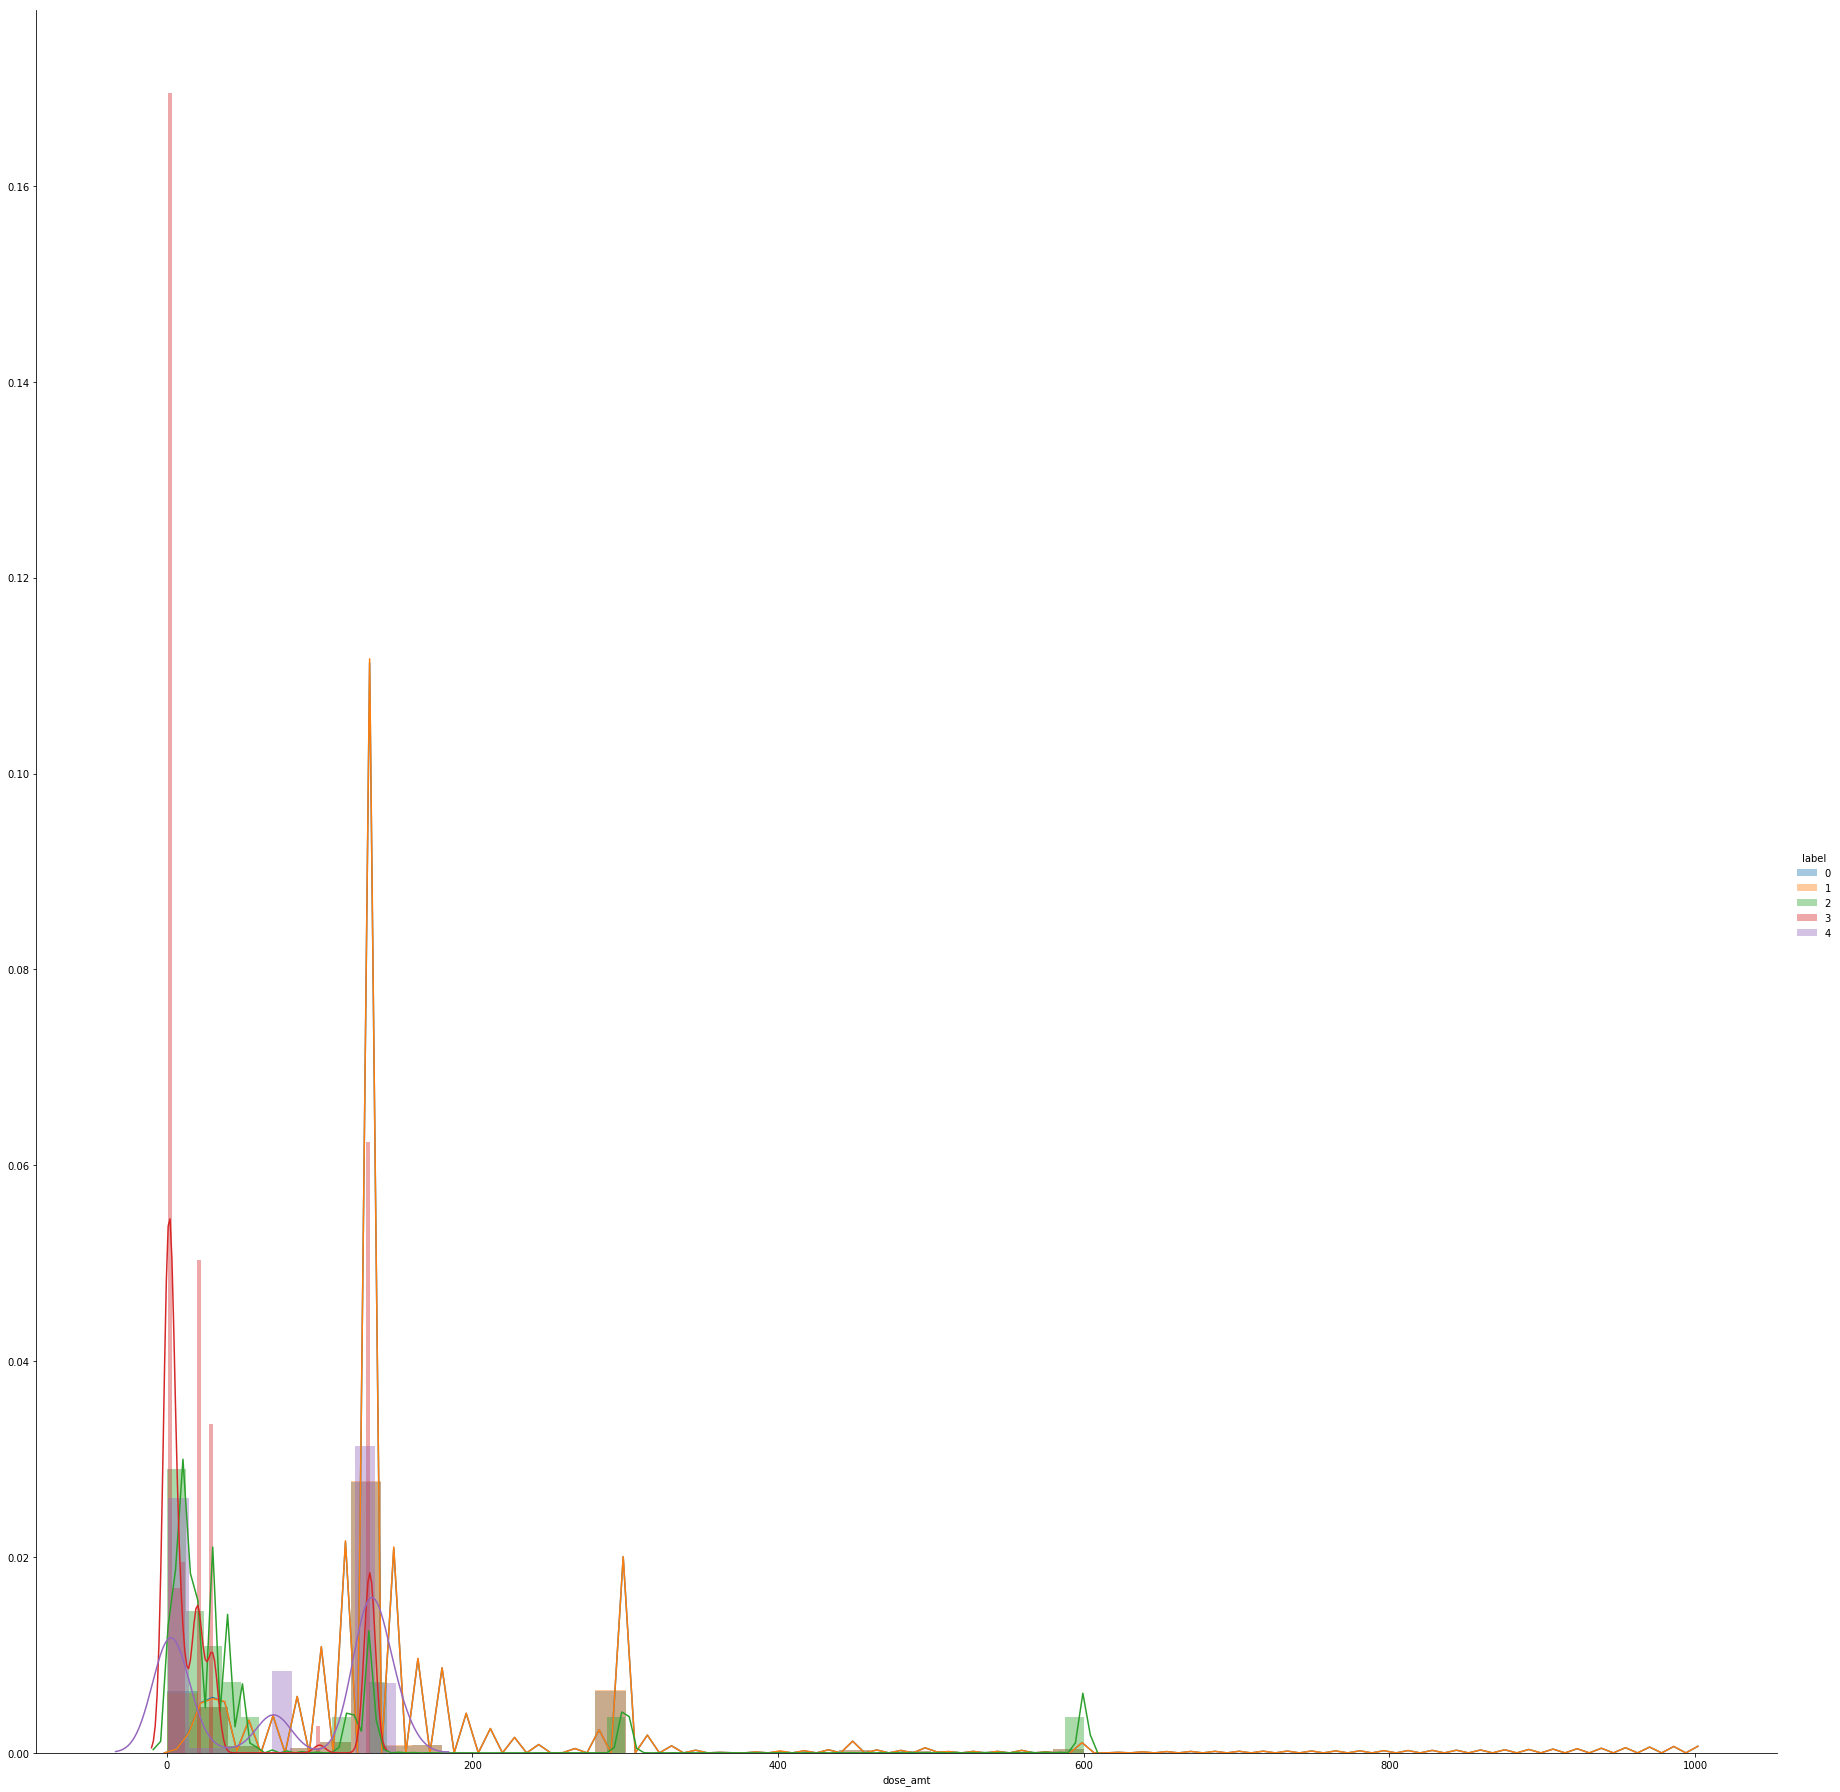

In [68]:
import seaborn as sns
sns.FacetGrid(df_faers,hue='label',size=25).map(sns.distplot,'dose_amt').add_legend()

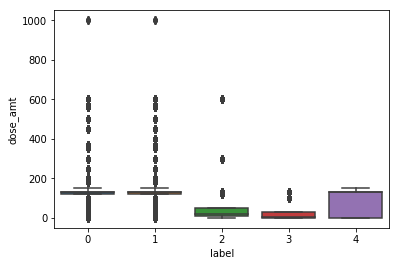

In [69]:
sns.boxplot(x='label',y='dose_amt',data=df_faers)
plt.show()

In [70]:
# sns.pairplot(df_faers,hue='label',height=10)
# plt.show()

In [71]:
#sns.heatmap(pd.crosstab([df_faers.label],[df_faers.dose_amt]),cmap='YlGnBu',annot=True,cbar=False,linewidth=10)

In [72]:
import seaborn as sns
#sns.lmplot(x='label',y='dose_amt',hue='Legendary',markers=['x','o'],fit_reg=False,data=df_faers)

In [73]:
df_faers = df_faers.drop(['age_grp'],axis=1)

In [74]:
df_faers.columns

Index(['primaryid', 'caseid_x_x', 'caseversion', 'i_f_code', 'event_dt',
       'mfr_dt', 'fda_dt', 'rept_cod', 'mfr_num', 'mfr_sndr', 'lit_ref', 'age',
       'age_cod', 'sex', 'e_sub', 'wt', 'wt_cod', 'rept_dt', 'occp_cod',
       'reporter_country', 'occr_country', 'caseid_y_x', 'drug_seq',
       'role_cod', 'drugname', 'prod_ai', 'val_vbm', 'route', 'dose_vbm',
       'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num',
       'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq',
       'caseid_x_y', 'dsg_drug_seq', 'start_dt', 'end_dt', 'dur', 'dur_cod',
       'caseid_y_y', 'indi_drug_seq', 'indi_pt', 'pt', 'drug_rec_act',
       'label'],
      dtype='object')

In [75]:
df_faers.occp_cod.unique()

array(['MD', 'CN', 'LW', 'OT'], dtype=object)

In [76]:
df_faers = df_faers.drop(['wt'],axis=1)

In [77]:
df_faers.sex.value_counts()

F    1814224
M     185776
Name: sex, dtype: int64

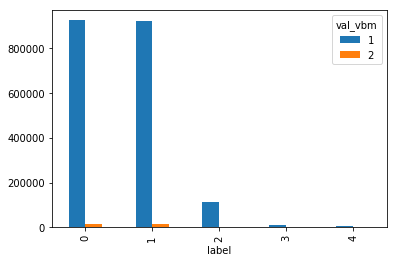

In [78]:
pd.crosstab(df_faers['label'],df_faers['val_vbm']).plot.bar()

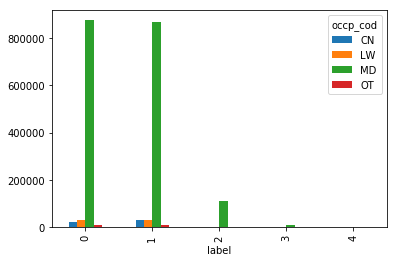

In [79]:
pd.crosstab(df_faers['label'],df_faers['occp_cod']).plot.bar()

In [80]:
df_faers = df_faers[(df_faers['occp_cod']) != 'LW']

In [81]:
df_faers.shape

(1939072, 50)

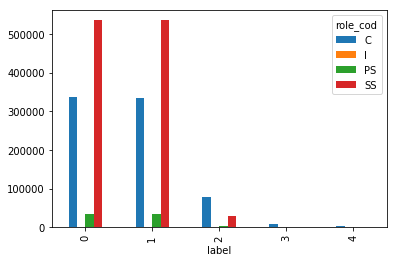

In [82]:
pd.crosstab(df_faers['label'],df_faers['role_cod']).plot.bar()

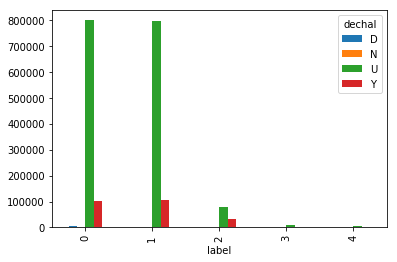

In [83]:
pd.crosstab(df_faers['label'],df_faers['dechal']).plot.bar()

In [84]:
df_faers = df_faers.drop(['dur_cod'],axis=1)

In [85]:
df_faers.columns

Index(['primaryid', 'caseid_x_x', 'caseversion', 'i_f_code', 'event_dt',
       'mfr_dt', 'fda_dt', 'rept_cod', 'mfr_num', 'mfr_sndr', 'lit_ref', 'age',
       'age_cod', 'sex', 'e_sub', 'wt_cod', 'rept_dt', 'occp_cod',
       'reporter_country', 'occr_country', 'caseid_y_x', 'drug_seq',
       'role_cod', 'drugname', 'prod_ai', 'val_vbm', 'route', 'dose_vbm',
       'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num',
       'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq',
       'caseid_x_y', 'dsg_drug_seq', 'start_dt', 'end_dt', 'dur', 'caseid_y_y',
       'indi_drug_seq', 'indi_pt', 'pt', 'drug_rec_act', 'label'],
      dtype='object')

In [86]:
df_faers = df_faers.drop(['dur'],axis=1)

In [87]:
# new = data["Name"].str.split(" ", n = 1, expand = True) 
# df['new'] = df['Synonyms'].str.split('|')

In [88]:
df_faers.indi_drug_seq.unique()

array([ 1.,  2.,  8.,  9., 10., 13., 14., 15., 16., 18., 19.,  3.,  7.,
       11., 12.,  4., 21., 22., 23.,  5.,  6., 17., 30., 31., 32., 24.,
       25., 26., 27., 28., 29., 33., 34., 35.])

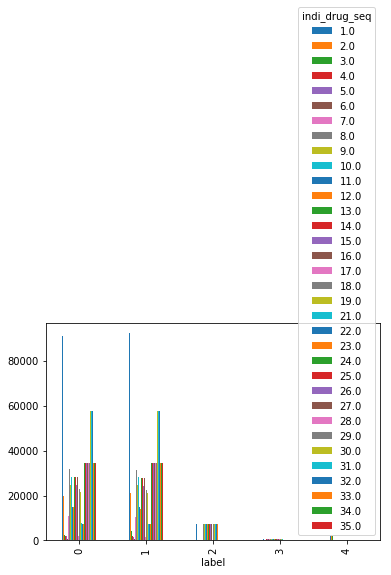

In [89]:
pd.crosstab(df_faers['label'],df_faers['indi_drug_seq']).plot.bar()

In [90]:
df_faers.select_dtypes(exclude='object').columns

Index(['primaryid', 'caseid_x_x', 'caseversion', 'event_dt', 'mfr_dt',
       'fda_dt', 'age', 'rept_dt', 'caseid_y_x', 'drug_seq', 'val_vbm',
       'cum_dose_chr', 'nda_num', 'dose_amt', 'caseid_x_y', 'dsg_drug_seq',
       'caseid_y_y', 'indi_drug_seq', 'label'],
      dtype='object')

In [91]:
num_cols = ['primaryid', 'caseid_x_x', 'caseversion', 'event_dt', 'mfr_dt',
       'fda_dt', 'age', 'rept_dt', 'caseid_y_x', 'drug_seq', 'val_vbm',
       'cum_dose_chr', 'nda_num', 'dose_amt', 'caseid_x_y', 'dsg_drug_seq',
       'caseid_y_y', 'indi_drug_seq', 'label']

In [92]:
df_faers.select_dtypes(include='object').columns

Index(['i_f_code', 'rept_cod', 'mfr_num', 'mfr_sndr', 'lit_ref', 'age_cod',
       'sex', 'e_sub', 'wt_cod', 'occp_cod', 'reporter_country',
       'occr_country', 'role_cod', 'drugname', 'prod_ai', 'route', 'dose_vbm',
       'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'dose_unit',
       'dose_form', 'dose_freq', 'start_dt', 'end_dt', 'indi_pt', 'pt',
       'drug_rec_act'],
      dtype='object')

In [93]:
#### Dropping drug_rec_act- all void #########3
ddf_faers = df_faers.drop(['drug_rec_act'],axis=1)

In [94]:
cat_cols = ['i_f_code', 'rept_cod', 'mfr_num', 'mfr_sndr', 'lit_ref', 'sex',
       'e_sub', 'occp_cod', 'reporter_country', 'occr_country',
       'role_cod', 'drugname', 'prod_ai', 'route', 'dose_vbm', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'dose_unit', 'dose_form', 'dose_freq',
       'start_dt', 'end_dt', 'indi_pt', 'pt']

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
df_faers.head()

,primaryid,caseid_x_x,caseversion,i_f_code,event_dt,mfr_dt,fda_dt,rept_cod,mfr_num,mfr_sndr,...,caseid_x_y,dsg_drug_seq,start_dt,end_dt,caseid_y_y,indi_drug_seq,indi_pt,pt,drug_rec_act,label
0,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS,...,10008085.0,1.0,20130308.0,void,10008085.0,1.0,Neuroendocrine tumour,Abdominal adhesions,void,0
1,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS,...,10008085.0,1.0,20130308.0,void,10008085.0,1.0,Neuroendocrine tumour,Anaemia,void,0
2,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS,...,10008085.0,1.0,20130308.0,void,10008085.0,1.0,Neuroendocrine tumour,Arrhythmia,void,0
3,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS,...,10008085.0,1.0,20130308.0,void,10008085.0,1.0,Neuroendocrine tumour,Arthralgia,void,0
4,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS,...,10008085.0,1.0,20130308.0,void,10008085.0,1.0,Neuroendocrine tumour,Atrial fibrillation,void,0


In [97]:
df_faers.dose_freq.unique()

array(['QOW', '/month', 'QD', 'BID', '/wk', 'TID', '1X', 'QID', 'Q4H',
       'Q8H', 'Q3W', 'Q12H'], dtype=object)

In [98]:
df_faers['dose_freq'] = df_faers['dose_freq'].replace({'QOW':2,'/month':1,'QD':30,'BID':60,'/wk':4,'TID':'90','1X':1,'QID':120,'Q4H':180,'Q8H':240,'Q3H':1.5,'Q12H':60})

In [99]:
df_faers.iloc[0:10,0:10]

,primaryid,caseid_x_x,caseversion,i_f_code,event_dt,mfr_dt,fda_dt,rept_cod,mfr_num,mfr_sndr
0,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS
1,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS
2,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS
3,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS
4,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS
5,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS
6,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS
7,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS
8,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS
9,1000808590,10008085,90,F,20131213.0,20190129.0,20190212,EXP,PHHY2013CA071340,NOVARTIS


In [100]:
df_faers.iloc[0:10,11:20]

,age,age_cod,sex,e_sub,wt_cod,rept_dt,occp_cod,reporter_country,occr_country
0,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA
1,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA
2,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA
3,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA
4,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA
5,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA
6,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA
7,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA
8,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA
9,73.0,YR,F,Y,KG,20190212.0,MD,CA,CA


In [101]:
df_faers.iloc[0:10,21:30]

,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit
0,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG
1,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG
2,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG
3,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG
4,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG
5,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG
6,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG
7,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG
8,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG
9,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",9484.405433,MG


In [102]:
df_faers.iloc[0:10,31:40]

,rechal,lot_num,nda_num,dose_amt,dose_unit,dose_form,dose_freq,caseid_x_y,dsg_drug_seq
0,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0
1,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0
2,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0
3,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0
4,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0
5,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0
6,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0
7,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0
8,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0
9,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",21008.0,20.0,MG,SOLUTION FOR INJECTION,2,10008085.0,1.0


In [103]:
df_faers.iloc[0:10,41:47]

,end_dt,caseid_y_y,indi_drug_seq,indi_pt,pt,drug_rec_act
0,void,10008085.0,1.0,Neuroendocrine tumour,Abdominal adhesions,void
1,void,10008085.0,1.0,Neuroendocrine tumour,Anaemia,void
2,void,10008085.0,1.0,Neuroendocrine tumour,Arrhythmia,void
3,void,10008085.0,1.0,Neuroendocrine tumour,Arthralgia,void
4,void,10008085.0,1.0,Neuroendocrine tumour,Atrial fibrillation,void
5,void,10008085.0,1.0,Neuroendocrine tumour,Back pain,void
6,void,10008085.0,1.0,Neuroendocrine tumour,Blood pressure decreased,void
7,void,10008085.0,1.0,Neuroendocrine tumour,Blood pressure increased,void
8,void,10008085.0,1.0,Neuroendocrine tumour,Blood pressure systolic increased,void
9,void,10008085.0,1.0,Neuroendocrine tumour,Body temperature decreased,void


In [104]:
df_faers.dose_vbm.unique()

array(['20 MG, BIW', '30 MG, QMO',
       '10 MG EVERY 4 WEEKS (2 WEEKS POST 40 MG DOSE, AS REPORTED)',
       '30 MG EVERY 4 WEEKS (2 WEEKS POST 10 MG DOSE, AS REPORTED)',
       '40 MG, QMO (EVERY 4 WEEKS)', '20 MG, Q2W', '30 MG, Q2W',
       '40 MG, QMO', '10 MG/DAY/TWICE', '140 MG, QD', '180 MG, QD',
       '120 MG, QD', '150 MG, BID', '50 MG, BID', '100 UG, BID',
       '80 MG,QOW', 'UNK', '1 DF, QMO', '125 MG, QWK', '20 MG/KG,QOW',
       '49.3 MG, QW', '20 MG, QMO (EVERY 4 WEEKS)',
       '30 MG, QMO ( EVERY 4 WEEKS/ EVERY 28 DAYS)',
       '500 MG, TID (FOR 7 DAYS)', '0.5 MG, QD', 'UNK UNK, ONCE/SINGLE',
       '20 MG, QMO (ONCE A MONTH)', '30 MG, QMO (ONCE A MONTH)',
       '40 MG, QMO (ONCE A MONTH)', '2 DF, QD',
       '2 DF, QD (40 MG ONCE A DAY)', '25 MG, UNK', '12.5 MG, UNK',
       'EXP DATE:05/2015?ANASTAZOLE PACK NO:1040431625896',
       'ALSO RECEIVED FROM 02-SEP-2013 TO 16-JUN-2014',
       'PREVIOUSLY TOOK FROM 04-JUN-2012 TO 24-JUN-2012. (CUMULATIVE DOSE: 309.91 D

In [105]:
df_faers.select_dtypes(include='object').shape

(1939072, 29)

In [106]:
df_faers.select_dtypes(include='object').columns

Index(['i_f_code', 'rept_cod', 'mfr_num', 'mfr_sndr', 'lit_ref', 'age_cod',
       'sex', 'e_sub', 'wt_cod', 'occp_cod', 'reporter_country',
       'occr_country', 'role_cod', 'drugname', 'prod_ai', 'route', 'dose_vbm',
       'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'dose_unit',
       'dose_form', 'dose_freq', 'start_dt', 'end_dt', 'indi_pt', 'pt',
       'drug_rec_act'],
      dtype='object')

In [107]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
n = LabelEncoder()
X=df_faers[cat_cols]

In [108]:
X

,i_f_code,rept_cod,mfr_num,mfr_sndr,lit_ref,sex,e_sub,occp_cod,reporter_country,occr_country,...,dechal,rechal,lot_num,dose_unit,dose_form,dose_freq,start_dt,end_dt,indi_pt,pt
0,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Abdominal adhesions
1,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Anaemia
2,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Arrhythmia
3,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Arthralgia
4,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Atrial fibrillation
5,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Back pain
6,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Blood pressure decreased
7,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Blood pressure increased
8,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Blood pressure systolic increased
9,F,EXP,PHHY2013CA071340,NOVARTIS,"CHUNG C, RUDEK M, KANG H, MARUR S, JOHN P, TSO...",F,Y,MD,CA,CA,...,U,U,"S0065E,S0003B,S0004,SE068,SR532,SN2",MG,SOLUTION FOR INJECTION,2,20130308.0,void,Neuroendocrine tumour,Body temperature decreased


In [109]:
categorical_feature_mask = df_faers.dtypes==object

In [110]:
categorical_cols = df_faers.columns[categorical_feature_mask].values

In [111]:
df_faers = df_faers.drop(['wt_cod'],axis=1)

In [112]:
df_faers[num_cols].shape

(1939072, 19)

In [113]:
df_faers[cat_cols].shape

(1939072, 26)

In [114]:
df_faers.shape

(1939072, 47)

In [115]:
for i in cat_cols:
    df_faers[i] = n.fit_transform(df_faers[i].astype('str'))
    #df_faers['dose_unit'] = n.fit_transform(df_faers['dose_unit'].astype('str'))

In [116]:
df_faers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939072 entries, 0 to 1999999
Data columns (total 47 columns):
primaryid           int64
caseid_x_x          int64
caseversion         int64
i_f_code            int64
event_dt            float64
mfr_dt              float64
fda_dt              int64
rept_cod            int64
mfr_num             int64
mfr_sndr            int64
lit_ref             int64
age                 float64
age_cod             object
sex                 int64
e_sub               int64
rept_dt             float64
occp_cod            int64
reporter_country    int64
occr_country        int64
caseid_y_x          int64
drug_seq            int64
role_cod            int64
drugname            int64
prod_ai             int64
val_vbm             int64
route               int64
dose_vbm            int64
cum_dose_chr        float64
cum_dose_unit       int64
dechal              int64
rechal              int64
lot_num             int64
nda_num             float64
dose_amt        

In [117]:
df_faers = df_faers.drop(['drug_rec_act'],axis=1)

In [118]:
df_faers['label'] = df_faers['label'].replace({2:1,3:1,4:1,0:0,1:0})

In [119]:
df_faers = df_faers.drop(['age_cod'],axis=1)

In [120]:
df_faers_final = df_faers.sample(500000)

In [121]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df_faers = minmax.fit_transform(df_faers.values)

In [122]:
df_faers.shape

(1939072, 45)

In [123]:
type(df_faers)

numpy.ndarray

In [125]:
df_faers_final.shape

(500000, 45)

In [ ]:
#({'HO':0,'OT':1,'LT':2,'DE':3,'DS':4})

In [126]:
from sklearn.model_selection import train_test_split
X = df_faers_final.drop(['label'],axis=1)
y = df_faers_final['label']

In [127]:
X.shape, y.shape

((500000, 44), (500000,))

In [128]:
#Divide the data into train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,
                                                 random_state = 42,
                                                 stratify = y )

In [129]:
y_test.shape

(150000,)

In [130]:
#Build a RandomForestClassifier model on train data and predict with test data
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(n_estimators=50, n_jobs=-1)                                  # initializing model 
model.fit(X_train,y_train)                                                 # fitting model
y_pred = model.predict(X_test)  

D:\softwares\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [131]:
#Get the accuracy and confusion matrix from y_pred and y_test
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc

print('accuracy:',   accuracy_score (y_test,y_pred) )

accuracy: 0.9047866666666666
